In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
movies = pd.read_table('movies.dat', header=None, sep="::", engine="python")
movies.columns = ['MovieID', 'Title', 'Genres']

In [82]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [83]:
movies.set_index('MovieID', inplace=True)

In [84]:
ratings = pd.read_table('ratings.dat', header=None, sep="::", engine="python")
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [85]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [86]:
users = pd.read_table('users.dat', header=None, sep="::", engine="python")
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [87]:
users.set_index('UserID',inplace=True)

In [88]:
users

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [89]:
ratings['Timestamp'].value_counts()

975528402     30
975440712     28
975527781     28
1025585635    27
975528243     27
              ..
965587797      1
975689210      1
1015941834     1
974225357      1
965909359      1
Name: Timestamp, Length: 458455, dtype: int64

In [90]:
tempdf1 = pd.merge(ratings, users, on="UserID")

In [91]:
tempdf1

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [92]:
master_data = pd.merge(tempdf1, movies, on="MovieID")

In [93]:
master_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [94]:
master_data.isna().any()

UserID        False
MovieID       False
Rating        False
Timestamp     False
Gender        False
Age           False
Occupation    False
Zip-code      False
Title         False
Genres        False
dtype: bool

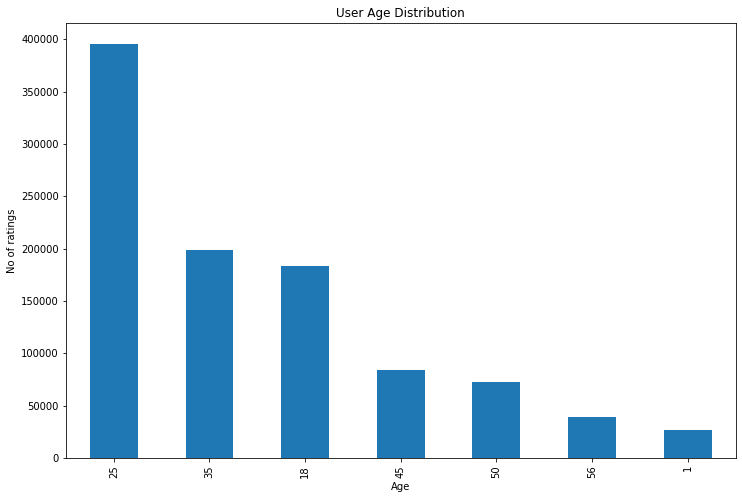

In [95]:
plt.figure(figsize=(12,8))
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of ratings")
master_data['Age'].value_counts().plot(kind="bar")
plt.show()

In [96]:
master_data[master_data['Title'].str.contains("Toy Story")]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6,1,4,978237008,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8,1,4,978233496,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022,3114,5,956755741,M,25,17,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024,3114,4,956749447,M,25,12,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027,3114,4,956726766,M,18,4,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036,3114,4,956710231,F,25,15,32603,Toy Story 2 (1999),Animation|Children's|Comedy


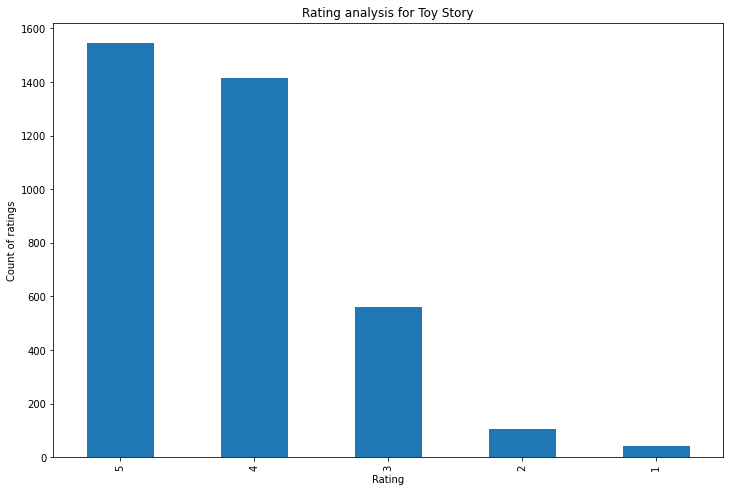

In [97]:
plt.figure(figsize=(12,8))
plt.title("Rating analysis for Toy Story")
plt.xlabel("Rating")
plt.ylabel("Count of ratings")
master_data[master_data['Title'].str.contains("Toy Story")]['Rating'].value_counts().plot(kind="bar")
plt.show()

In [98]:
top_movies = master_data.groupby('Title')
top_movies

In [99]:
# Highest rated top 25 movies
top_movies['Rating'].mean().sort_values(ascending = False).head(25)

Title
Baby, The (1973)                                                       5.000000
Lured (1947)                                                           5.000000
One Little Indian (1973)                                               5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Smashing Time (1967)                                                   5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [100]:
# Rating data for user id = 2696
master_data[master_data['UserID']==2696][['UserID','Title', 'Rating']]

,UserID,Title,Rating
24345,2696,Back to the Future (1985),2
29848,2696,E.T. the Extra-Terrestrial (1982),3
244232,2696,L.A. Confidential (1997),4
250014,2696,Lone Star (1996),5
273633,2696,JFK (1991),1
277808,2696,"Talented Mr. Ripley, The (1999)",4
371178,2696,Midnight in the Garden of Good and Evil (1997),4
377250,2696,Cop Land (1997),3
598042,2696,Palmetto (1998),4
603189,2696,"Perfect Murder, A (1998)",4


In [101]:
genres = master_data['Genres'].unique()

In [102]:
# find unique genres
unique_genres = set([j for i in genres for j in i.split('|')])
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [103]:
master_data = pd.concat([master_data, master_data.Genres.str.get_dummies()], axis=1) 

In [104]:
master_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [105]:
master_data.drop(['Genres'], axis=1, inplace=True)

In [106]:
master_data = pd.concat([master_data, master_data.Gender.str.get_dummies()], axis=1) 

In [107]:
master_data.drop(['Gender'], axis=1, inplace=True)

In [108]:
master_data.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Age', 'Occupation',
       'Zip-code', 'Title', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'F', 'M'],
      dtype='object')

In [109]:
master_data.isna().any()

UserID         False
MovieID        False
Rating         False
Timestamp      False
Age            False
Occupation     False
Zip-code       False
Title          False
Action         False
Adventure      False
Animation      False
Children's     False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Film-Noir      False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
War            False
Western        False
F              False
M              False
dtype: bool

In [110]:
 # Factors affecting rating

In [140]:
y = master_data['Rating'].copy(deep=True)

In [141]:
x = master_data.drop(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Zip-code'], axis=1)

In [142]:
print(y.shape, x.shape)

(1000209,) (1000209, 22)


In [143]:
x.columns

Index(['Age', 'Occupation', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'F', 'M'],
      dtype='object')

In [144]:
x

,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,56,16,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,25,12,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,25,7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,50,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,18,17,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1000205,35,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1000206,18,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1000207,18,20,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [145]:
x = pd.concat([x,pd.get_dummies(x['Occupation'],prefix="Occupation")], axis=1)

In [146]:
x.drop(['Occupation'], inplace=True, axis=1)

In [147]:
x.columns

Index(['Age', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'F', 'M', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20'],
      dtype='object')

In [148]:
x.drop(['Occupation_0'], inplace=True, axis=1)

In [149]:
x.isna().any()

Age              False
Action           False
Adventure        False
Animation        False
Children's       False
Comedy           False
Crime            False
Documentary      False
Drama            False
Fantasy          False
Film-Noir        False
Horror           False
Musical          False
Mystery          False
Romance          False
Sci-Fi           False
Thriller         False
War              False
Western          False
F                False
M                False
Occupation_1     False
Occupation_2     False
Occupation_3     False
Occupation_4     False
Occupation_5     False
Occupation_6     False
Occupation_7     False
Occupation_8     False
Occupation_9     False
Occupation_10    False
Occupation_11    False
Occupation_12    False
Occupation_13    False
Occupation_14    False
Occupation_15    False
Occupation_16    False
Occupation_17    False
Occupation_18    False
Occupation_19    False
Occupation_20    False
dtype: bool

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
print(x.shape, y.shape)

(1000209, 41) (1000209,)


In [152]:
x = x[:20000]
y = y[:20000]

In [153]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=10)

In [154]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(14000, 41) (6000, 41) (14000,) (6000,)


In [156]:
from sklearn.svm import SVC
classifier = SVC()

In [157]:
classifier.fit(train_x, train_y)

SVC()

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
train_predictions = classifier.predict(train_x)
accuracy_score(train_predictions, train_y)

0.41914285714285715

In [160]:
predictions = classifier.predict(test_x)
predictions

array([5, 4, 5, ..., 5, 5, 4], dtype=int64)

In [161]:
test_y

19778    4
4376     4
10188    5
9887     5
4441     4
        ..
12069    3
6414     5
1418     5
8619     5
16435    5
Name: Rating, Length: 6000, dtype: int64

In [162]:
accuracy_score(test_y, predictions)

0.42483333333333334

In [163]:
x.head()

,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,25,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,25,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
